In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#新增场地elo和 排名、积分

In [2]:
#match_df = pd.read_csv(r"F:\大四\tennis_predicton\processed_data_1\match_df_20_24.csv",low_memory=False)
#match_df = pd.read_csv(r"F:\大四\tennis_predicton\processed_data_1\match_df_15_19.csv",low_memory=False)
#match_df = pd.read_csv(r"F:\大四\tennis_predicton\processed_data_1\match_df_10_14.csv",low_memory=False)
#match_df = pd.read_csv(r"F:\大四\tennis_predicton\processed_data_1\match_df_05_09.csv",low_memory=False)
match_df = pd.read_csv(r"..\dataset\processed_data_1\match_df_00_04.csv",low_memory=False)

In [3]:
match_df.head()

,tourney_id,tourney_date,round_code,best_of,player1_id,player2_id,player1_seed_bucket,player1_entry,player1_host,player1_hand,player1_ht,player1_age,player1_rank,player1_rank_points,player1_elo,player1_match_counts,player1_ace,player1_df,player1_svpt,player1_fstIn,player1_fstWon,player1_sndWon,player1_SvGms,player1_bpSaved,player1_bpFaced,baseline_rally,intensity,player1_ace_rate,player1_df_rate,player1_serve_win_rate,player1_serve_efficiency,player1_clutch_ability,player1_o_seed_bucket,player1_o_entry,player1_o_host,player1_o_hand,player1_o_ht,player1_o_age,player1_o_rank,player1_o_rank_points,player1_o_ace,player1_o_df,player1_o_svpt,player1_o_fstIn,player1_o_fstWon,player1_o_sndWon,player1_o_SvGms,player1_o_bpSaved,player1_o_bpFaced,player1_o_ace_rate,player1_o_df_rate,player1_o_serve_win_rate,player1_o_serve_efficiency,player1_o_clutch_ability,player1_o_elo,result,player1_ace_hist,player1_df_hist,player1_svpt_hist,player1_fstIn_hist,player1_fstWon_hist,player1_sndWon_hist,player1_SvGms_hist,player1_bpSaved_hist,player1_bpFaced_hist,player1_baseline_rally_hist,player1_intensity_hist,player1_ace_rate_hist,player1_df_rate_hist,player1_serve_win_rate_hist,player1_serve_efficiency_hist,player1_clutch_ability_hist,player1_ace_hist_e,player1_df_hist_e,player1_svpt_hist_e,player1_fstIn_hist_e,player1_fstWon_hist_e,player1_sndWon_hist_e,player1_SvGms_hist_e,player1_bpSaved_hist_e,player1_bpFaced_hist_e,player1_baseline_rally_hist_e,player1_intensity_hist_e,player1_ace_rate_hist_e,player1_df_rate_hist_e,player1_serve_win_rate_hist_e,player1_serve_efficiency_hist_e,player1_clutch_ability_hist_e,player1_o_seed_bucket_histo,player1_o_entry_histo,player1_o_host_histo,player1_o_hand_histo,player1_o_ht_histo,player1_o_age_histo,player1_o_rank_histo,player1_o_rank_points_histo,player1_o_ace_histo,player1_o_df_histo,player1_o_svpt_histo,player1_o_fstIn_histo,player1_o_fstWon_histo,player1_o_sndWon_histo,player1_o_SvGms_histo,player1_o_bpSaved_histo,player1_o_bpFaced_histo,player1_o_ace_rate_histo,player1_o_df_rate_histo,player1_o_serve_win_rate_histo,player1_o_serve_efficiency_histo,player1_o_clutch_ability_histo,player1_o_elo_histo,player2_seed_bucket,player2_entry,player2_host,player2_hand,player2_ht,player2_age,player2_rank,player2_rank_points,player2_elo,player2_match_counts,player2_ace,player2_df,player2_svpt,player2_fstIn,player2_fstWon,player2_sndWon,player2_SvGms,player2_bpSaved,player2_bpFaced,player2_ace_rate,player2_df_rate,player2_serve_win_rate,player2_serve_efficiency,player2_clutch_ability,player2_o_seed_bucket,player2_o_entry,player2_o_host,player2_o_hand,player2_o_ht,player2_o_age,player2_o_rank,player2_o_rank_points,player2_o_ace,player2_o_df,player2_o_svpt,player2_o_fstIn,player2_o_fstWon,player2_o_sndWon,player2_o_SvGms,player2_o_bpSaved,player2_o_bpFaced,player2_o_ace_rate,player2_o_df_rate,player2_o_serve_win_rate,player2_o_serve_efficiency,player2_o_clutch_ability,player2_o_elo,player2_ace_hist,player2_df_hist,player2_svpt_hist,player2_fstIn_hist,player2_fstWon_hist,player2_sndWon_hist,player2_SvGms_hist,player2_bpSaved_hist,player2_bpFaced_hist,player2_baseline_rally_hist,player2_intensity_hist,player2_ace_rate_hist,player2_df_rate_hist,player2_serve_win_rate_hist,player2_serve_efficiency_hist,player2_clutch_ability_hist,player2_ace_hist_e,player2_df_hist_e,player2_svpt_hist_e,player2_fstIn_hist_e,player2_fstWon_hist_e,player2_sndWon_hist_e,player2_SvGms_hist_e,player2_bpSaved_hist_e,player2_bpFaced_hist_e,player2_baseline_rally_hist_e,player2_intensity_hist_e,player2_ace_rate_hist_e,player2_df_rate_hist_e,player2_serve_win_rate_hist_e,player2_serve_efficiency_hist_e,player2_clutch_ability_hist_e,player2_o_seed_bucket_histo,player2_o_entry_histo,player2_o_host_histo,player2_o_hand_histo,player2_o_ht_histo,player2_o_age_histo,player2_o_rank_histo,player2_o_rank_points_histo,player2_o_ace_histo,player2_o_df_histo,player2_o_svpt_histo,player2_o_fstIn_histo,player2_o_fstWon_histo,player2_o_sndWon_histo,player2_o_SvGms_hi

In [4]:
# 保留不变的列
static_columns = [
    "tourney_id", "tourney_date", "round_code", "best_of", 
    "player1_id", "player2_id", "result"
]

# 获取所有 player_1 和 player_2 相关列
player1_columns = [col for col in match_df.columns if col.startswith("player1_") and col != "player1_id"]
player2_columns = [col.replace("player1_", "player2_") for col in player1_columns]

# 计算差值并创建新DataFrame
new_data = match_df[static_columns].copy()
for p1_col, p2_col in zip(player1_columns, player2_columns):
    if p2_col in match_df.columns:
        new_col_name = p1_col.replace("player1_", "sym_")
        new_data[new_col_name] = match_df[p1_col] - match_df[p2_col]


In [5]:
# 将新数据保存到新的CSV文件
#new_data.to_csv(r"F:\大四\tennis_predicton\processed_data_1\match_df_20_24_symmetry.csv", index=False)
#new_data.to_csv(r"F:\大四\tennis_predicton\processed_data_1\match_df_15_19_symmetry.csv", index=False)
#new_data.to_csv(r"F:\大四\tennis_predicton\processed_data_1\match_df_10_14_symmetry.csv", index=False)
#new_data.to_csv(r"F:\大四\tennis_predicton\processed_data_1\match_df_05_09_symmetry.csv", index=False)
new_data.to_csv(r"F:\大四\tennis_predicton\processed_data_1\match_df_00_04_symmetry.csv", index=False)
print("数据处理完成，已保存")

数据处理完成，已保存


In [8]:
print(new_data.columns.tolist())

['tourney_id', 'tourney_date', 'round_code', 'best_of', 'surface_Clay', 'surface_Grass', 'surface_Hard', 'player1_id', 'player2_id', 'result', 'sym_index', 'sym_seed_bucket', 'sym_entry', 'sym_host', 'sym_hand', 'sym_ht', 'sym_age', 'sym_rank', 'sym_rank_points', 'sym_elo', 'sym_ace', 'sym_df', 'sym_svpt', 'sym_fstIn', 'sym_fstWon', 'sym_sndWon', 'sym_SvGms', 'sym_bpSaved', 'sym_bpFaced', 'sym_ace_rate', 'sym_df_rate', 'sym_serve_win_rate', 'sym_serve_efficiency', 'sym_clutch_ability', 'sym_o_seed_bucket', 'sym_o_entry', 'sym_o_host', 'sym_o_hand', 'sym_o_ht', 'sym_o_age', 'sym_o_rank', 'sym_o_rank_points', 'sym_o_ace', 'sym_o_df', 'sym_o_svpt', 'sym_o_fstIn', 'sym_o_fstWon', 'sym_o_sndWon', 'sym_o_SvGms', 'sym_o_bpSaved', 'sym_o_bpFaced', 'sym_o_ace_rate', 'sym_o_df_rate', 'sym_o_serve_win_rate', 'sym_o_serve_efficiency', 'sym_o_clutch_ability', 'sym_o_sets', 'sym_o_games', 'sym_o_elo', 'sym_ace_hist', 'sym_df_hist', 'sym_svpt_hist', 'sym_fstIn_hist', 'sym_fstWon_hist', 'sym_sndWon_hi

In [9]:
new_data.head(1)

,tourney_id,tourney_date,round_code,best_of,surface_Clay,surface_Grass,surface_Hard,player1_id,player2_id,result,sym_index,sym_seed_bucket,sym_entry,sym_host,sym_hand,sym_ht,sym_age,sym_rank,sym_rank_points,sym_elo,sym_ace,sym_df,sym_svpt,sym_fstIn,sym_fstWon,sym_sndWon,sym_SvGms,sym_bpSaved,sym_bpFaced,sym_ace_rate,sym_df_rate,sym_serve_win_rate,sym_serve_efficiency,sym_clutch_ability,sym_o_seed_bucket,sym_o_entry,sym_o_host,sym_o_hand,sym_o_ht,sym_o_age,sym_o_rank,sym_o_rank_points,sym_o_ace,sym_o_df,sym_o_svpt,sym_o_fstIn,sym_o_fstWon,sym_o_sndWon,sym_o_SvGms,sym_o_bpSaved,sym_o_bpFaced,sym_o_ace_rate,sym_o_df_rate,sym_o_serve_win_rate,sym_o_serve_efficiency,sym_o_clutch_ability,sym_o_sets,sym_o_games,sym_o_elo,sym_ace_hist,sym_df_hist,sym_svpt_hist,sym_fstIn_hist,sym_fstWon_hist,sym_sndWon_hist,sym_SvGms_hist,sym_bpSaved_hist,sym_bpFaced_hist,sym_baseline_rally_hist,sym_intensity_hist,sym_ace_rate_hist,sym_df_rate_hist,sym_serve_win_rate_hist,sym_serve_efficiency_hist,sym_clutch_ability_hist,sym_ace_hist_e,sym_df_hist_e,sym_svpt_hist_e,sym_fstIn_hist_e,sym_fstWon_hist_e,sym_sndWon_hist_e,sym_SvGms_hist_e,sym_bpSaved_hist_e,sym_bpFaced_hist_e,sym_baseline_rally_hist_e,sym_intensity_hist_e,sym_ace_rate_hist_e,sym_df_rate_hist_e,sym_serve_win_rate_hist_e,sym_serve_efficiency_hist_e,sym_clutch_ability_hist_e,sym_o_seed_bucket_histo,sym_o_entry_histo,sym_o_host_histo,sym_o_hand_histo,sym_o_ht_histo,sym_o_age_histo,sym_o_rank_histo,sym_o_rank_points_histo,sym_o_ace_histo,sym_o_df_histo,sym_o_svpt_histo,sym_o_fstIn_histo,sym_o_fstWon_histo,sym_o_sndWon_histo,sym_o_SvGms_histo,sym_o_bpSaved_histo,sym_o_bpFaced_histo,sym_o_ace_rate_histo,sym_o_df_rate_histo,sym_o_serve_win_rate_histo,sym_o_serve_efficiency_histo,sym_o_clutch_ability_histo,sym_o_elo_histo,sym_baseline_rally_histo,sym_intensity_histo
0,2020-8888,2020-01-06,2.0,3,0,0,1,100644,126774,0,86,0,0,0,0,5.0,1.3,1.0,-1955.0,179.093666,0.0,9.0,10.0,-4.0,-8.0,1.0,-1.0,3.0,6.0,-0.008081,0.433333,-0.264646,1.875,0.0,0,0,0,0,-5.0,-1.3,-1.0,1955.0,0.0,-9.0,-10.0,4.0,8.0,-1.0,1.0,-3.0,-6.0,0.008081,-0.433333,0.264646,-1.875,0.0,2,7,-179.093666,1.005891,1.842208,-0.836917,1.687512,0.006192,-2.321719,-0.186348,0.223873,0.661657,-0.01068,0.070355,0.015836,0.088189,-0.018441,0.015817,0.0101,-3.121653,5.796153,-29.506242,-20.177222,-17.661847,-8.989172,-3.924265,-1.96023,0.259611,-0.045458,0.166172,-0.012267,0.359112,-0.113285,-0.351884,-0.312077,-0.521643,-0.003914,-0.004253,-0.014039,0.360735,0.358921,10.752588,-357.685656,-0.37628,0.349179,1.241908,-0.8817,-1.68654,0.23118,0.076031,0.365778,1.067751,-0.005947,0.009524,-0.028232,0.041396,-0.012104,6.624164,-0.010993,0.070035


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.base import clone  # 新增导入解决NameError

In [7]:
df = new_data.copy()

In [15]:
print(df.columns.tolist())

['tourney_id', 'tourney_date', 'round_code', 'best_of', 'surface_Clay', 'surface_Grass', 'surface_Hard', 'player1_id', 'player2_id', 'result', 'sym_level_0', 'sym_index', 'sym_seed_bucket', 'sym_entry', 'sym_host', 'sym_hand', 'sym_ht', 'sym_age', 'sym_rank', 'sym_rank_points', 'sym_elo_before_hard', 'sym_elo_before_clay', 'sym_elo_before_grass', 'sym_ace', 'sym_df', 'sym_svpt', 'sym_fstIn', 'sym_fstWon', 'sym_sndWon', 'sym_SvGms', 'sym_bpSaved', 'sym_bpFaced', 'sym_ace_rate', 'sym_df_rate', 'sym_serve_win_rate', 'sym_serve_efficiency', 'sym_clutch_ability', 'sym_o_seed_bucket', 'sym_o_entry', 'sym_o_host', 'sym_o_hand', 'sym_o_ht', 'sym_o_age', 'sym_o_rank', 'sym_o_rank_points', 'sym_o_ace', 'sym_o_df', 'sym_o_svpt', 'sym_o_fstIn', 'sym_o_fstWon', 'sym_o_sndWon', 'sym_o_SvGms', 'sym_o_bpSaved', 'sym_o_bpFaced', 'sym_o_ace_rate', 'sym_o_df_rate', 'sym_o_serve_win_rate', 'sym_o_serve_efficiency', 'sym_o_clutch_ability', 'sym_o_sets', 'sym_o_games', 'sym_o_elo_before_hard', 'sym_o_elo_be

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# 假设 df 是最终包含所有特征的数据集，result 为标签

# 划分特征集，举例：选取 _hist 与其他特征（这里需要根据实际特征列名来指定）
hist_features = [col for col in df.columns if col.endswith('_hist')]
hist_e_features = [col for col in df.columns if col.endswith('_hist_e')]
inmatch_features = [col for col in df.columns if col not in hist_features  + ['result',"tourney_id",
                                                        "tourney_date","player1_id","player2_id", "sym_ret",
                                                        'sym_sets', 'sym_games','sym_sets', 'sym_games']]
supplement_features =['round_code','best_of', 'surface_Clay', 'surface_Grass', 'surface_Hard','sym_seed_bucket',
                     'sym_entry', 'sym_host', 'sym_hand', 'sym_ht','sym_age','sym_elo_before_grass','sym_elo_before_clay','sym_elo_before_hard']
#important_features =['sym_serve_win_rate','sym_serve_efficiency','sym_clutch_ability']
elo_features =['sym_elo_before_grass','sym_elo_before_clay','sym_elo_before_hard']
rank_features =['sym_rank', 'sym_rank_points']
opponent_features = hist_e_features = [col for col in df.columns if col.endswith('_histo')]

# 构造不同特征组合
X_A = df[hist_features + supplement_features]
X_B = df[hist_e_features + supplement_features]
X_C = df[hist_features + hist_e_features + supplement_features + opponent_features + rank_features]
#X_C = df[elo_features]
X_D = df[hist_features + rank_features]
X_F = df[hist_features + elo_features]
y = df['result']

# 分割训练集和测试集
X_A_train, X_A_test, y_train, y_test = train_test_split(X_A, y, test_size=0.3, random_state=42)
X_B_train, X_B_test, _, _ = train_test_split(X_B, y, test_size=0.3, random_state=42)
X_C_train, X_C_test, _, _ = train_test_split(X_C, y, test_size=0.3, random_state=42)
X_D_train, X_D_test, _, _ = train_test_split(X_D, y, test_size=0.3, random_state=42)
X_F_train, X_F_test, _, _ = train_test_split(X_F, y, test_size=0.3, random_state=42)

In [20]:
# ==================================================================
# 定义三个模型（逻辑回归/ANN/决策树）和对应的标准化器
# ==================================================================
models = [
    {
        "name": "Logistic Regression",
        "clf": LogisticRegression(max_iter=1000, random_state=42),
        "scaler": StandardScaler()  # 逻辑回归需要标准化
    },
    {
        "name": "ANN",
        "clf": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
        "scaler": StandardScaler()  # 神经网络需要标准化
    },
    {
        "name": "Decision Tree",
        "clf": DecisionTreeClassifier(random_state=42),
        "scaler": None  # 决策树不需要标准化
    }
]

# ==================================================================
# 遍历每个模型进行训练和评估
# ==================================================================
for model in models:
    print(f"\n=== 对称特征模型: {model['name']} ===")
    # 遍历不同特征组合
    for feature_set_name, X_train, X_test in [
#        ('Hist+s', X_A_train, X_A_test),
#        ('Hist_e+s', X_B_train, X_B_test),
        ('Hist+Hist_e+s', X_C_train, X_C_test),
#        ('hist+r', X_D_train, X_D_test),
#        ('hist+e', X_F_train, X_F_test)
    ]:
        # 克隆一个新模型确保每次训练独立
        clf = clone(model["clf"])  # 现在可以正常使用了
        
        # 数据标准化处理（如果该模型需要）
        if model["scaler"] is not None:
            # 训练集标准化
            scaler = clone(model["scaler"])
            X_train_scaled = scaler.fit_transform(X_train)
            # 测试集使用相同的scaler转换
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test
        
        # 模型训练
        clf.fit(X_train_scaled, y_train)
        
        # 预测结果
        y_pred = clf.predict(X_test_scaled)
        
        # 计算评估指标
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])
        f1 = f1_score(y_test, y_pred)
        
        # 打印结果
        print(f"特征组合 [{feature_set_name}] - Accuracy: {acc:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}")


=== 对称特征模型: Logistic Regression ===
特征组合 [Hist+Hist_e+s] - Accuracy: 0.6588, AUC: 0.7235, F1: 0.6564

=== 对称特征模型: ANN ===
特征组合 [Hist+Hist_e+s] - Accuracy: 0.5923, AUC: 0.6352, F1: 0.5877

=== 对称特征模型: Decision Tree ===
特征组合 [Hist+Hist_e+s] - Accuracy: 0.5655, AUC: 0.5655, F1: 0.5645


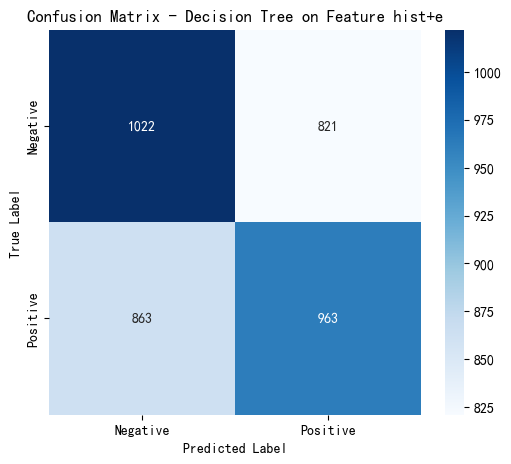

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {model['name']} on Feature {feature_set_name}")
plt.show()

In [12]:
import numpy as np

misclassified_indices = np.where(y_test != y_pred)[0]  # 获取错分类的索引
print(f"错分样本数: {len(misclassified_indices)}")


错分样本数: 1684


In [13]:
# 获取测试集对应的原始索引
X_test_original_index = X_test.index  

# 通过索引获取错分样本在原始 df 中的位置
misclassified_original_indices = X_test_original_index[misclassified_indices]

# 提取错分类样本在原始 df 中的特征
df_misclassified = df.loc[misclassified_original_indices]

# 输出部分错分类样本的信息
print(df_misclassified.head())


      tourney_id tourney_date  round_code  best_of  surface_Clay  \
10365  2024-0425   2024-04-15         2.0        3             1   
11848  2024-5014   2024-10-02         4.0        3             0   
6778    2023-580   2023-01-16         1.0        5             0   
9845   2024-0499   2024-02-12         5.0        3             0   
10283  2024-0717   2024-04-01         7.0        3             1   

       surface_Grass  surface_Hard  player1_id  player2_id  result  \
10365              0             0      105077      124186       0   
11848              0             1      105676      100644       1   
6778               0             1      202103      105550       1   
9845               0             1      126207      207925       1   
10283              0             0      126207      210097       0   

       sym_level_0  sym_index  sym_seed_bucket  sym_entry  sym_host  sym_hand  \
10365       -29019         43                0         -1         1        -1   
11848   

In [14]:
# 计算错分类样本和整体数据的均值对比
feature_comparison = df_misclassified.describe().T[['mean', 'std']]
feature_comparison['overall_mean'] = df.describe().T['mean']
feature_comparison['overall_std'] = df.describe().T['std']

# 计算均值偏差
feature_comparison['mean_diff'] = feature_comparison['mean'] - feature_comparison['overall_mean']

# 按照偏差排序，看看哪些特征在错分类样本中差异最大
feature_comparison = feature_comparison.sort_values(by="mean_diff", ascending=False)

print(feature_comparison)


                                       mean           std   overall_mean  \
player2_id                    139342.262470  41420.539815  138341.661923   
sym_rank_points                   46.363339   1848.702364       9.116286   
sym_o_rank_points_histo            5.895189    480.533867     -10.302942   
sym_elo_before_hard               10.275793    329.801782      -1.133347   
sym_elo_before_clay               10.549597    252.462361      -0.237051   
sym_elo_before_grass               6.057748    220.962701      -1.005748   
sym_o_rank                         0.540688    148.077774      -2.340475   
sym_fstIn                          0.293349     11.260410       0.014066   
sym_age                            0.200475      6.366247      -0.037414   
sym_fstIn_hist                     0.208416      7.255567      -0.009919   
sym_o_svpt_histo                   0.284929      9.355811       0.103987   
sym_o_df                           0.145487      3.118320      -0.001063   
sym_svpt_his